In [20]:
import os
import pandas as pd
import numpy as np
import rioxarray as rxr
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from datetime import datetime
import matplotlib.colors as mpl
import seaborn as sns
from tqdm import tqdm  
from sklearn.linear_model import Ridge
from scipy.stats import skew
import matplotlib.gridspec as gridspec
import calendar
import scipy.stats as scs
import datetime
from numpy import linspace, meshgrid
from scipy.signal import savgol_filter
from shapely.ops import unary_union
from sklearn.preprocessing import MinMaxScaler

In [27]:
df = pd.read_csv("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_policy_database.csv").dropna(axis=0,how='all').dropna(axis=1,how='all')
df.replace(np.nan, '--', inplace=True)
df.drop('Name of Researcher Compiled data',axis=1,inplace=True)
df.to_csv("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_policy_database.csv")

In [2]:
homepath = os.getcwd()

# Loading and Formatting MPI Data
path = homepath + "/assets/data/"
df_sh_hanoi = pd.read_csv(path+"/hanoi_stakeholders.csv").dropna(how='any').astype(str)
df_sh_hanoi

,Organisation Name,Stakeholder catagorization,Area of Activity in the food system
0,ASSET : Agroecological and Safe food System Tr...,International community,Service provision
1,Agriculture and Life Journal,Media,Sociocultural element
2,Agriculture and Rural Development Bank (Agribank),Private sector,Finance
3,Agriculture Journal,Media,Sociocultural element
4,Alliance Bioversity CIAT,International community,Service provision
...,...,...,...
109,World Health Organization (WHO),International community,Institutional elements
110,World Vision International Vietnam,International community,Service provision
111,World Wide Fund For Nature (WWF),International community,Service provision
112,Sustainable Food Systems Ireland in Vietnam,International community,Service provision


In [7]:
df_sh.columns

Index(['Organisation Name', 'Primary sector ', 'Main Focus area* ',
       'Focus area 2 (if available)', 'Focus area 3 (if available)',
       'Area of Activity (Food Systems Value Chain)', 'Scale of Activity',
       'Description', 'Website', 'Name #1', 'Research domain', 'Role  #1',
       'Email  #1', 'Telephone  #1', 'Name #2', 'Role  #2', 'Email  #2',
       'Telephone  #2', 'Name #3', 'Role  #3', 'Email  #3', 'Telephone  #3',
       'Name #4', 'Role  #4', 'Email  #4', 'Telephone  #4', 'Name #5',
       'Role  #5', 'Email  #5', 'Telephone  #5', 'Workshop Attendee?',
       'Contacted for EFS Activity?', 'Collaboration Details',
       'Person who sourced the contact', 'Contact checked (Y/N)'],
      dtype='object')

In [16]:
df_sh = pd.read_csv(path+"/addis_stakeholders.csv")
df_sh_clip = df_sh[['Organisation Name', 'Primary sector ', 'Area of Activity (Food Systems Value Chain)', 'Scale of Activity', 'Website', 'Description']]
df_sh_clip = df_sh_clip.drop_duplicates()
df_sh_clip = df_sh_clip.set_index('Organisation Name').dropna(how='all')
df_sh_clip = df_sh_clip[~df_sh_clip.apply(lambda x: len(set(x)) == 1, axis=1)]
df_sh_clip = df_sh_clip.replace('Natiional', 'National', regex=False)
df_sh_clip.replace(np.nan, '--', inplace=True)
df_sh_clip

,Primary sector,Area of Activity (Food Systems Value Chain),Scale of Activity,Website,Description
Organisation Name,,,,,
Action for Development,Civil Society,Capacity Building and Aid,National,https://www.afdethiopia.org/contact,Food security and sustinable livelihoods
World Bank,International Community,Capacity Building and Aid,International,https://www.worldbank.org/en/country/ethiopia,"Focuses on delivery of basic services, food se..."
CARE Ethiopia,Civil Society,Capacity Building and Aid,National (NGO),https://www.care.org/our-work/where-we-work/et...,"Works on food securtiy, health, education, cli..."
Mercy Corps,Civil Society,Capacity Building and Aid,National (NGO),https://www.mercycorps.org/where-we-work/ethiopia,"Works on food securtiy, health, and climate"
IFAD,Civil Society,Capacity Building and Aid,National (NGO),https://www.ifad.org/en/w/countries/ethiopia,By colaborating with the government of Ethiopi...
...,...,...,...,...,...
Melka Ethiopia,Civil Society,Capacity building and aid,National NGO,https://melcaethiopia.org/,--
Ethiopian Sustainable Food System and Agroecology Consortium,Civil Society,Capacity building and aid,National NGO,https://esfsac-ethiopia.org/about/,--
Addis Ababa Abattoirs Enterprise,Private Sector,Trade,National,--,--


In [ ]:
for col in df_sh_clip.columns:
    print(col,
df_sh_clip[col].astype(str).str.len().max())

Primary sector  42
Area of Activity (Food Systems Value Chain) 68
Scale of Activity 25
Website 85
Description 510


In [17]:
df_sh_clip.to_csv(path+"/addis_stakeholders_cleaned.csv")

In [9]:
df_nutr = pd.read_csv("/home/jemima/Data/EcoFoodSystems_Dashboard_Development/assets/data/addis_nutrition_outcomes_cleaned.csv")
df_nutr.head(10)

,Cat,Age groups,Outcomes,Reg,Value
0,Percent Distribution of Stunting Among Childre...,CHILDREN,Stunting,Addis Ababa,13.9
1,Percent Distribution of Stunting Among Childre...,CHILDREN,Stunting,National,40.9
2,Percent Distribution of Stunting Among Childre...,CHILDREN,Wasting (%),Addis Ababa,3.8
3,Percent Distribution of Stunting Among Childre...,CHILDREN,Wasting (%),National,11.2
4,Percent Distribution of Stunting Among Childre...,CHILDREN,Underweight (%),Addis Ababa,5.5
5,Percent Distribution of Stunting Among Childre...,CHILDREN,Underweight (%),National,23.3


In [10]:
df_mpi = pd.read_csv("/home/jemima/Data/EcoFoodSystems_Dashboard_Development/assets/data/addis_mpi_long.csv")
df_mpi.head(10)

,Dist_Name,Variable,Value
0,Addis Ketema,Cooking fuel,28.0
1,Addis Ketema,Housing,79.0
2,Addis Ketema,Assets,44.2
3,Addis Ketema,Drinking water,9.8
4,Addis Ketema,Sanitation,85.7
5,Addis Ketema,Electricity,0.0
6,Akaki Kality,Cooking fuel,21.7
7,Akaki Kality,Housing,52.5
8,Akaki Kality,Assets,27.7
9,Akaki Kality,Drinking water,4.5


<Axes: >

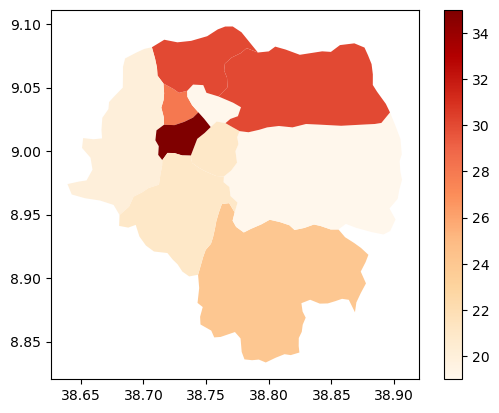

In [13]:
gdf_mpi = gpd.read_file("/home/jemima/Data/EcoFoodSystems_Dashboard_Development/assets/data/addis_adm3_mpi.geojson")
gdf_mpi.plot('MPI', cmap='OrRd', legend=True)

In [26]:
df_foodsec = pd.read_csv("/home/jemima/Data/EcoFoodSystems_Dashboard_Development/assets/data/addis_foodsecurity.csv")
df_foodsec.replace({'Moderat to sever food insecure':'Moderate-Severe Food Insecurity',
                    'Food secure':'Secure',
                    'Mild food insecure':'Mild Food Insecurity  '}, inplace=True)
df_foodsec.head(10)

,Sub City,Food security status,Percentage
0,Addis Ketema,Secure,36.0
1,Addis Ketema,Mild Food Insecurity,25.8
2,Addis Ketema,Moderate-Severe Food Insecurity,38.2
3,Akaki Kality,Secure,18.9
4,Akaki Kality,Mild Food Insecurity,33.1
5,Akaki Kality,Moderate-Severe Food Insecurity,48.0
6,Arada,Secure,54.7
7,Arada,Mild Food Insecurity,24.2
8,Arada,Moderate-Severe Food Insecurity,21.1
9,Bole,Secure,84.7


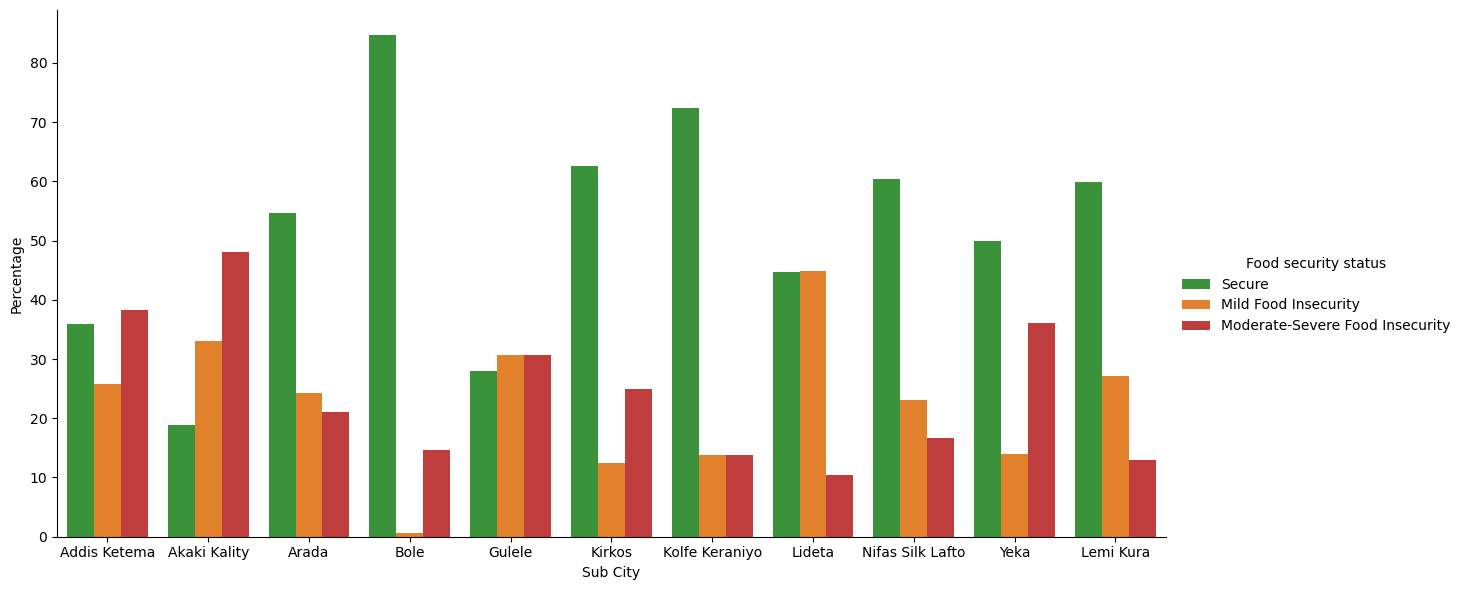

In [27]:
sns.catplot(df_foodsec, kind='bar', x='Sub City', y='Percentage', hue='Food security status', 
            palette=['#2ca02c', '#ff7f0e', '#d62728'],
            height=6, aspect=12/6)

In [95]:
df_foodsec_long = df_foodsec.pivot(index='Sub City', columns='Food security status', values='Percentage')
geos = gdf_mpi[['NAME_3', 'geometry']]
geoseries = gpd.GeoDataFrame(gpd.GeoSeries(geos.set_index('NAME_3')['geometry']).to_crs('EPSG:4326').representative_point())
gdf_foodsec = geoseries.merge(df_foodsec_long, left_on='NAME_3', right_index=True).set_geometry(0)
gdf_foodsec.rename(columns={0: 'geometry'}, inplace=True)
gdf_foodsec = gdf_foodsec[['Secure', 'Mild Food Insecurity  ', 'Moderate-Severe Food Insecurity', 'geometry']]
gdf_foodsec.head(5)

,Secure,Mild Food Insecurity,Moderate-Severe Food Insecurity,geometry
NAME_3,,,,
Addis Ketema,36.0,25.8,38.2,POINT (38.72656 9.03828)
Akaki Kality,18.9,33.1,48.0,POINT (38.80992 8.89919)
Arada,54.7,24.2,21.1,POINT (38.75797 9.03537)
Bole,84.7,0.6,14.7,POINT (38.83602 8.98208)
Gulele,28.0,30.7,30.7,POINT (38.73853 9.07104)


In [96]:
gdf_foodsec.to_file("/home/jemima/Data/EcoFoodSystems_Dashboard_Development/assets/data/addis_food_security.geojson")

<Axes: >

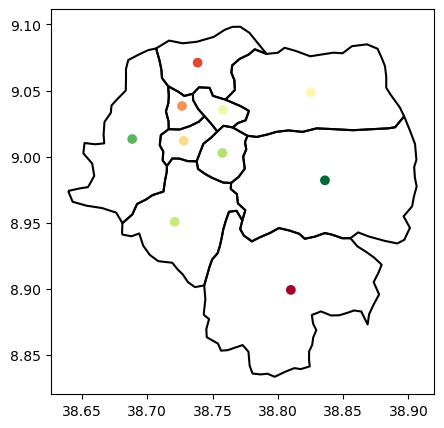

In [89]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
gdf_foodsec.plot('Secure', ax=ax, cmap='RdYlGn')
geos.boundary.plot(ax=ax, color='black')

In [ ]:
def create_pie_chart_icon(values, colors, size=40):
    """
    Create a pie chart as a base64 encoded image for use as a Leaflet marker icon.
    
    Parameters:
    - values: list of values for pie slices
    - colors: list of colors for each slice
    - size: size of the icon in pixels
    """
    fig, ax = plt.subplots(figsize=(size/100, size/100), dpi=100)
    ax.pie(values, colors=colors, startangle=90)
    ax.axis('equal')
    
    # Remove margins
    plt.tight_layout(pad=0)
    
    # Save to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', transparent=True, bbox_inches='tight', pad_inches=0)
    buf.seek(0)
    plt.close()
    
    # Encode to base64
    img_base64 = base64.b64encode(buf.read()).decode()
    return f"data:image/png;base64,{img_base64}"

In [ ]:
import dash_leaflet as dl
from dash import Dash, html
import dash_bootstrap_components as dbc
import matplotlib.pyplot as plt
import io
import base64
import json

# Create a simple Dash app with Leaflet map
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Create pie chart markers for food security data with tooltips
marker_lst = []
for i in range(gdf_foodsec.shape[0]):
    # Get the subcity name and food security percentages
    subcity_name = gdf_foodsec.index[i]
    secure = gdf_foodsec.iloc[i]['Secure']
    mild = gdf_foodsec.iloc[i]['Mild Food Insecurity  ']
    severe = gdf_foodsec.iloc[i]['Moderate-Severe Food Insecurity']
    
    # Create tooltip content - using simpler text format
    tooltip_content = f"{subcity_name} - \nSecure: {secure:.1f}%\nMild: {mild:.1f}%\nSevere: {severe:.1f}%"
    
    marker = dl.Marker(
        position=[float(x) for x in str(gdf_foodsec.iloc[i].values[-1]).split('POINT (')[1].strip(')').replace(' ', ', ').split(',')][::-1], 
        icon = {
            "iconUrl": create_pie_chart_icon(gdf_foodsec.iloc[i].values[:3], ['#2ca02c', '#ff7f0e', '#d62728'], size=30),
            "iconSize": [30, 30],
            "iconAnchor": [15, 15]  # Center the icon
        },
        children=[
            dl.Tooltip(tooltip_content)
        ]
    )
    marker_lst.append(marker)

# Convert GeoDataFrame boundaries to GeoJSON format
boundaries_geojson = json.loads(geos.to_json())

# Define the layout with different basemap and boundaries
app.layout = html.Div([
    html.H3("Addis Ababa Food Security Dashboard", style={"textAlign": "center"}),
    dl.Map(
        [
            # CartoDB Positron (light clean basemap)
            dl.TileLayer(
                url="https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png",
                attribution='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>'
            ),
            
            # Add GeoJSON boundaries layer
            dl.GeoJSON(
                data=boundaries_geojson,
                style={
                    'color': 'black',
                    'weight': 1,
                    'fillOpacity': 0,  # Transparent fill
                },
                id='boundaries-layer'
            ),
            
            # Add pie chart markers on top
            dl.LayerGroup(marker_lst, id='markers-layer')
        ],
        center=[8.991626, 38.763706],
        zoom=11,
        style={"width": "100%", "height": "90vh"},
    )
])

# Run the app in Jupyter mode
# This will start the server on port 8050 (or next available)
# Access it at http://localhost:8050 in your browser
if __name__ == '__main__':
    app.run(debug=True, jupyter_mode='external', port=8050)

Dash app running on http://127.0.0.1:8050/


In [ ]:
import plotly.express as px

outlets = os.listdir('/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/jsons_addis/')
cats = [str(o.split('_')[0]) for o in outlets]
names = [
    o.split('_')[1] if len(o.split('_')) < 4
    else f"{o.split('_')[1]} {o.split('_')[2]}"
    for o in outlets
]

['shop', 'amenity', 'shop', 'shop', 'shop', 'shop', 'amenity', 'shop', 'shop', 'amenity', 'shop', 'shop', 'amenity', 'shop', 'shop', 'amenity', 'amenity', 'amenity', 'shop', 'shop', 'amenity', 'amenity', 'shop', 'amenity', 'shop']


In [14]:
pip install dash_leaflet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.2/810.2 kB 9.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [dash_leaflet] [dash-extensions]]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json
import geopandas as gpd
import dash
from dash import html, dcc
import dash_leaflet as dl
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

dirpath = "/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/jsons_addis/"
geojson_files = sorted(os.listdir(dirpath))

# Define a simple color palette
colors = ["blue", "red", "green", "orange", "purple", "brown", "pink", "cyan"]

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id="layer-select",
            options=[{"label": f.split('_')[1] if len(f.split('_')) < 4 else f"{f.split('_')[1]} {f.split('_')[2]}", 
                      "value": f} for f in geojson_files],
            multi=True,
            placeholder="Select outlet layers to display")],
        style={
            'margin': '10px 50px',
            'zIndex': '1000',
            'justifyContent': 'end',
            'alignItems': 'center',
            'textAlign': 'center'
        }
    ),
    
    dl.Map(center=[9.1, 38.7], zoom=10, children=[
         dl.TileLayer(
                url="https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png",
                attribution='&copy; OpenStreetMap contributors &copy; CARTO'
            ),
        dl.LayerGroup(id="geojson-layers")
    ], style={'width': '100%', 'height': '600px'})
])


@app.callback(
    Output("geojson-layers", "children"),
    Input("layer-select", "value")
)
def update_layers(selected):
    if not selected:
        return []

    layers = []

    for i, filename in enumerate(selected):
        f = gpd.read_file(dirpath + filename).to_crs('EPSG:4326')
        g = json.loads(f.to_json())
        color = colors[i % len(colors)]  # Cycle through palette if more layers than colors

        layers.append(
            dl.GeoJSON(
                data=g,
                zoomToBounds=True,
                cluster=True,
                zoomToBoundsOnClick=True,
                superClusterOptions=dict(radius=100),
                id=filename.split('_')[1] if len(filename.split('_')) < 4 else f"{filename.split('_')[1]} {filename.split('_')[2]}",
                options=dict(style=dict(color=color, weight=2, opacity=0.5, fillOpacity=0.2),
            )
        ))

    return layers

app.run(debug=True)

In [45]:
filename = outlets[0]
f = gpd.read_file(dirpath+filename).to_crs('EPSG:4326')
g = json.loads(f.to_json())
name = filename.split('_')[1] if len(filename.split('_')) < 4 else f"{filename.split('_')[1]} {filename.split('_')[2]}"
name

'convenience'

In [24]:
df = pd.read_csv("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_nutrition_outcomes_cleaned.csv")
print(*df['Cat'][12:18])

Percent Distribution of Anthropometric Status of WRA (15-49 Years) Body Mass Index (BMI) Percent Distribution of Anthropometric Status of WRA (15-49 Years) Body Mass Index (BMI) Percent Distribution of Anthropometric Status of WRA (15-49 Years) Body Mass Index (BMI) Percent Distribution of Anthropometric Status of WRA (15-49 Years) Body Mass Index (BMI) Percent Distribution of Anthropometric Status of Adolescent Girls (10-19 Years)  Percent Distribution of Anthropometric Status of Adolescent Girls (10-19 Years) 


In [3]:
gdf = gpd.read_file("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_diet_env_mapping.geojson")
gdf

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,...,pop_sum,density_pop_healthy,density_pop_unhealthy,total_density_pop,acc_healthyaccess_pop_healthysum,acc_unhealthyaccess_unhealthy_popsum,pct_access_healthy,ptc_access_unhealthy,classification_access_pop,geometry
0,ETH.1.1.1_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,AddisKetema,...,140444.615778,0.014240,0.163766,0.178006,5805.536378,97089.748271,4.134,69.130,Low Access,"MULTIPOLYGON (((470876.504 1000114.243, 470887..."
1,ETH.1.1.2_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Akaki-Kalit,...,484063.490809,0.006198,0.051646,0.057844,21893.776116,104129.843980,4.523,21.512,Low Access,"MULTIPOLYGON (((475024.176 989519.976, 474836...."
2,ETH.1.1.3_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Arada,...,155281.791363,0.019320,0.444353,0.463673,28127.141331,138080.643343,18.114,88.923,Low Access,"MULTIPOLYGON (((471842.317 998245.112, 470887...."
3,ETH.1.1.4_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Bole,...,802868.140773,0.034875,0.252844,0.287718,218152.580956,402970.753994,27.172,50.191,Middle Acc,"MULTIPOLYGON (((484125.724 988033.917, 483444...."
4,ETH.1.1.5_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Gulele,...,291495.887090,0.006861,0.089195,0.096056,29943.483639,148264.912413,10.272,50.863,Low Access,"MULTIPOLYGON (((470876.504 1000114.243, 470140..."
5,ETH.1.1.6_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Kirkos,...,239721.892516,0.050058,0.442179,0.492237,68628.351719,234610.767325,28.628,97.868,Middle Acc,"MULTIPOLYGON (((472918.528 996961.894, 473446...."
6,ETH.1.1.7_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Kolfe-Keran,...,793869.896166,0.010077,0.051646,0.061723,65862.308874,261015.685452,8.296,32.879,Low Access,"MULTIPOLYGON (((468788.888 1000757.057, 468798..."
7,ETH.1.1.8_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Lideta,...,161852.194137,0.006178,0.086499,0.092677,17292.621506,105993.968463,10.684,65.488,Low Access,"MULTIPOLYGON (((468830.054 997163.864, 469753...."
8,ETH.1.1.9_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,NefasSilk,...,691210.876528,0.014467,0.176502,0.190969,93278.558267,418120.587349,13.495,60.491,Low Access,"MULTIPOLYGON (((475024.176 989519.976, 474540...."
9,ETH.1.1.10_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Yeka,...,685953.162735,0.020410,0.112253,0.132662,138836.108947,284472.398519,20.240,41.471,Low Access,"MULTIPOLYGON (((474226.66 997292.708, 474644.5..."


In [6]:
gdf['NAME_3']

0    AddisKetema
1    Akaki-Kalit
2          Arada
3           Bole
4         Gulele
5         Kirkos
6    Kolfe-Keran
7         Lideta
8      NefasSilk
9           Yeka
Name: NAME_3, dtype: object

In [7]:
gdf.replace({'AddisKetema':'Addis Ketema',
             'Akaki-Kalit':'Akaki - Kalit',
             'Kolfe-Keran':'Kolfe - Keran',
             'NefasSilk':'Nefas Silk'}, inplace=True)
gdf

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,...,pop_sum,density_pop_healthy,density_pop_unhealthy,total_density_pop,acc_healthyaccess_pop_healthysum,acc_unhealthyaccess_unhealthy_popsum,pct_access_healthy,ptc_access_unhealthy,classification_access_pop,geometry
0,ETH.1.1.1_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Addis Ketema,...,140444.615778,0.014240,0.163766,0.178006,5805.536378,97089.748271,4.134,69.130,Low Access,"MULTIPOLYGON (((470876.504 1000114.243, 470887..."
1,ETH.1.1.2_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Akaki - Kalit,...,484063.490809,0.006198,0.051646,0.057844,21893.776116,104129.843980,4.523,21.512,Low Access,"MULTIPOLYGON (((475024.176 989519.976, 474836...."
2,ETH.1.1.3_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Arada,...,155281.791363,0.019320,0.444353,0.463673,28127.141331,138080.643343,18.114,88.923,Low Access,"MULTIPOLYGON (((471842.317 998245.112, 470887...."
3,ETH.1.1.4_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Bole,...,802868.140773,0.034875,0.252844,0.287718,218152.580956,402970.753994,27.172,50.191,Middle Acc,"MULTIPOLYGON (((484125.724 988033.917, 483444...."
4,ETH.1.1.5_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Gulele,...,291495.887090,0.006861,0.089195,0.096056,29943.483639,148264.912413,10.272,50.863,Low Access,"MULTIPOLYGON (((470876.504 1000114.243, 470140..."
5,ETH.1.1.6_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Kirkos,...,239721.892516,0.050058,0.442179,0.492237,68628.351719,234610.767325,28.628,97.868,Middle Acc,"MULTIPOLYGON (((472918.528 996961.894, 473446...."
6,ETH.1.1.7_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Kolfe - Keran,...,793869.896166,0.010077,0.051646,0.061723,65862.308874,261015.685452,8.296,32.879,Low Access,"MULTIPOLYGON (((468788.888 1000757.057, 468798..."
7,ETH.1.1.8_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Lideta,...,161852.194137,0.006178,0.086499,0.092677,17292.621506,105993.968463,10.684,65.488,Low Access,"MULTIPOLYGON (((468830.054 997163.864, 469753...."
8,ETH.1.1.9_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Nefas Silk,...,691210.876528,0.014467,0.176502,0.190969,93278.558267,418120.587349,13.495,60.491,Low Access,"MULTIPOLYGON (((475024.176 989519.976, 474540...."
9,ETH.1.1.10_1,ETH,Ethiopia,ETH.1_1,AddisAbeba,NA,ETH.1.1_1,AddisAbeba,NA,Yeka,...,685953.162735,0.020410,0.112253,0.132662,138836.108947,284472.398519,20.240,41.471,Low Access,"MULTIPOLYGON (((474226.66 997292.708, 474644.5..."


In [11]:
adm = gpd.read_file("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/eth_adm3.json")
adm = adm[adm['NAME_2'] == 'Addis Abeba']
gdf_merge = adm.merge(gdf.drop('geometry', axis=1), left_on='NAME_3', right_on='NAME_3')
gdf_merge.head(5)

,id,ID_0,ISO,NAME_0,ID_1,NAME_1_x,ID_2,NAME_2_x,ID_3,NAME_3,...,classificaction_obesogenic,pop_sum,density_pop_healthy,density_pop_unhealthy,total_density_pop,acc_healthyaccess_pop_healthysum,acc_unhealthyaccess_unhealthy_popsum,pct_access_healthy,ptc_access_unhealthy,classification_access_pop
0,eth_adm3.1,74,ETH,Ethiopia,1,Addis Abeba,1,Addis Abeba,1,Addis Ketema,...,High obeso,140444.615778,0.014240,0.163766,0.178006,5805.536378,97089.748271,4.134,69.130,Low Access
1,eth_adm3.2,74,ETH,Ethiopia,1,Addis Abeba,1,Addis Abeba,2,Akaki - Kalit,...,Moderate o,484063.490809,0.006198,0.051646,0.057844,21893.776116,104129.843980,4.523,21.512,Low Access
2,eth_adm3.3,74,ETH,Ethiopia,1,Addis Abeba,1,Addis Abeba,3,Arada,...,High obeso,155281.791363,0.019320,0.444353,0.463673,28127.141331,138080.643343,18.114,88.923,Low Access
3,eth_adm3.4,74,ETH,Ethiopia,1,Addis Abeba,1,Addis Abeba,4,Bole,...,Moderate o,802868.140773,0.034875,0.252844,0.287718,218152.580956,402970.753994,27.172,50.191,Middle Acc
4,eth_adm3.5,74,ETH,Ethiopia,1,Addis Abeba,1,Addis Abeba,5,Gulele,...,High obeso,291495.887090,0.006861,0.089195,0.096056,29943.483639,148264.912413,10.272,50.863,Low Access


In [12]:
gdf_merge.columns

Index(['id', 'ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1_x', 'ID_2', 'NAME_2_x',
       'ID_3', 'NAME_3', 'CCN_3', 'CCA_3', 'TYPE_3_x', 'ENGTYPE_3_x',
       'NL_NAME_3_x', 'VARNAME_3_x', 'geometry', 'GID_3', 'GID_0', 'COUNTRY',
       'GID_1', 'NAME_1_y', 'NL_NAME_1', 'GID_2', 'NAME_2_y', 'NL_NAME_2',
       'VARNAME_3_y', 'NL_NAME_3_y', 'TYPE_3_y', 'ENGTYPE_3_y', 'CC_3',
       'HASC_3', 'area_km2', 'Count_healthy', 'Count_UnhealthyOutlets',
       'Count_MixOutlets', 'density_healthyout', 'density_unhealthyout',
       'density_mixoutlets', 'ratio_obesogenic', 'classificaction_obesogenic',
       'pop_sum', 'density_pop_healthy', 'density_pop_unhealthy',
       'total_density_pop', 'acc_healthyaccess_pop_healthysum',
       'acc_unhealthyaccess_unhealthy_popsum', 'pct_access_healthy',
       'ptc_access_unhealthy', 'classification_access_pop'],
      dtype='object')

In [15]:
gdf_merge.to_file("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_diet_env_mapping.geojson", driver='GeoJSON')

In [18]:
cols = ['Count_healthy', 'Count_UnhealthyOutlets',
       'Count_MixOutlets', 'density_healthyout', 'density_unhealthyout',
       'density_mixoutlets', 'ratio_obesogenic'
       'pop_sum', 'density_pop_healthy', 'density_pop_unhealthy',
       'total_density_pop', 'acc_healthyaccess_pop_healthysum',
       'acc_unhealthyaccess_unhealthy_popsum', 'pct_access_healthy',
       'ptc_access_unhealthy']

data_labels = ['Healthy Outlet Count', 'Unhealthy Outlet Count',
           'Mixed Outlet Count', 'Healthy Outlet Density', 'Unhealthy Outlet Density',
           'Mixed Outlet Density', 'Obesogenic Ratio'
           'Total Population', 'Population Density Healthy Outlets', 'Population Density Unhealthy Outlets',
           'Total Population Density', 'Accessibility Healthy Outlets', 'Accessibility Unhealthy Outlets',
           'Percentage Access Healthy Outlets', 'Percentage Access Unhealthy Outlets']

In [17]:
pd.DataFrame({'Column': cols, 'Label': data_labels})

,Column,Label
0,Count_healthy,Healthy Outlet Count
1,Count_UnhealthyOutlets,Unhealthy Outlet Count
2,Count_MixOutlets,Mixed Outlet Count
3,density_healthyout,Healthy Outlet Density
4,density_unhealthyout,Unhealthy Outlet Density
5,density_mixoutlets,Mixed Outlet Density
6,ratio_obesogenic,Obesogenic Ratio
7,classificaction_obesogenic,Obesogenic Classification
8,pop_sum,Total Population
9,density_pop_healthy,Population Density Healthy Outlets


In [19]:
import json
import geopandas as gpd
import pandas as pd
import dash
from dash import html, dcc
import dash_leaflet as dl
from dash.dependencies import Input, Output
from dash_extensions.javascript import assign

app = dash.Dash(__name__)

dirpath = "/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/"
geojson_path = dirpath + "addis_diet_env_mapping.geojson"

# Load GeoDataFrame once at startup (not in callback)
gdf_base = gpd.read_file(geojson_path).to_crs('EPSG:4326')

# Define which metrics are "good" when higher (True) or "bad" when higher (False)
metric_direction = {
    'Count_healthy': True,                  # More healthy outlets = good
    'Count_UnhealthyOutlets': False,        # More unhealthy = bad
    'Count_MixOutlets': None,               # Neutral
    'density_healthyout': True,             # Higher density healthy = good
    'density_unhealthyout': False,          # Higher density unhealthy = bad
    'density_mixoutlets': None,             # Neutral
    'ratio_obesogenic': False,              # Higher ratio = worse
    'pop_sum': None,                        # Just informative
    'density_pop_healthy': True,            # More access = good
    'density_pop_unhealthy': False,         # More unhealthy access = bad
    'total_density_pop': None,              # Just informative
    'acc_healthyaccess_pop_healthysum': True,   # More access = good
    'acc_unhealthyaccess_unhealthy_popsum': False,  # More unhealthy access = bad
    'pct_access_healthy': True,             # Higher % access = good
    'ptc_access_unhealthy': False           # Higher % unhealthy = bad
}

# Color schemes: green = good, red = bad, grey = neutral
green_scale = ['#e3f6d5', '#c1d88e', '#a5be91', '#6f946d', '#3a6649']  # light to dark green
red_scale = ['#fee5d9', '#fcbba1', '#fc9272', '#fb6a4a', '#de2d26']    # light to dark red
grey_scale = ['#f7f7f7', '#d9d9d9', '#bdbdbd', '#969696', '#636363']   # light to dark grey

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id="layer-select",
            options=[{"label": label, 
                      "value": col} for label, col in zip(data_labels, cols)],
            multi=False,
            placeholder="Select metric to display")],
        style={
            'margin': '10px 50px',
            'zIndex': '1000',
            'justifyContent': 'end',
            'alignItems': 'center',
            'textAlign': 'center'
        }
    ),
    
    html.Div(id="legend-container", style={
        'position': 'absolute',
        'top': '80px',
        'right': '20px',
        'zIndex': '1000',
        'backgroundColor': 'white',
        'padding': '10px',
        'borderRadius': '5px',
        'boxShadow': '0 2px 6px rgba(0,0,0,0.3)',
        'fontFamily': 'Arial, sans-serif',
        'fontSize': '12px'
    }),
    
    dl.Map(center=[9.1, 38.7], zoom=10, children=[
         dl.TileLayer(
                url="https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png",
                attribution='&copy; OpenStreetMap contributors &copy; CARTO'
            ),
        dl.LayerGroup(id="geojson-layers")
    ], style={'width': '100%', 'height': '600px', 'position': 'relative'})
])


@app.callback(
    [Output("geojson-layers", "children"),
     Output("legend-container", "children")],
    Input("layer-select", "value")
)
def update_layers(selected):
    if not selected:
        return [], []

    # Use the pre-loaded GeoDataFrame (copy to avoid modifying original)
    gdf = gdf_base.copy()
    
    # Check if column exists and convert to numeric
    if selected not in gdf.columns:
        return [], []
    
    gdf[selected] = pd.to_numeric(gdf[selected], errors='coerce')
    
    # Get GeoJSON
    geojson_data = json.loads(gdf.to_json())
    
    # Compute quantile breaks for choropleth
    series = gdf[selected].dropna()
    if series.empty:
        return [dl.GeoJSON(data=geojson_data, id=f'layer-{selected}', 
                          options=dict(style=dict(weight=1, color='#222', fillOpacity=0.1)))], []
    
    # Calculate 5 quantile classes
    try:
        classes = list(series.quantile([0.2, 0.4, 0.6, 0.8]).values)
    except Exception:
        classes = sorted(series.unique().tolist())[1:5] if len(series.unique()) > 1 else []
    
    # Choose color scale based on metric direction
    direction = metric_direction.get(selected, None)
    if direction is True:
        colorscale = green_scale
        legend_label = "Higher is better"
    elif direction is False:
        colorscale = red_scale
        legend_label = "Higher is worse"
    else:
        colorscale = grey_scale
        legend_label = "Neutral indicator"
    
    # JavaScript style function to avoid Python function serialization error
    style_fn = assign(
        "function(feature, context){\n"
        " const {classes, colors, colorProp} = context.hideout;\n"
        " const v = feature.properties[colorProp];\n"
        " if(v === null || v === undefined || isNaN(v)){\n"
        "   return {fillColor: '#cccccc', color: '#222', weight: 1, fillOpacity: 0.4};\n"
        " }\n"
        " for(let i=0;i<classes.length;i++){\n"
        "   if(v <= classes[i]){\n"
        "     return {fillColor: colors[i], color: '#222', weight: 1, fillOpacity: 0.7};\n"
        "   }\n"
        " }\n"
        " return {fillColor: colors[colors.length-1], color: '#222', weight: 1, fillOpacity: 0.7};\n"
        "}"
    )
    
    # Create legend
    min_val = series.min()
    max_val = series.max()
    legend_items = [
        html.Div([
            html.Strong(data_labels[cols.index(selected)]),
            html.Div(legend_label, style={'fontSize': '10px', 'fontStyle': 'italic', 'marginBottom': '8px'})
        ])
    ]
    
    # Add color boxes with value ranges
    all_breaks = [min_val] + classes + [max_val]
    for i, color in enumerate(colorscale):
        if i < len(all_breaks) - 1:
            legend_items.append(
                html.Div([
                    html.Div(style={
                        'width': '20px',
                        'height': '15px',
                        'backgroundColor': color,
                        'border': '1px solid #999',
                        'display': 'inline-block',
                        'marginRight': '5px'
                    }),
                    html.Span(f"{all_breaks[i]:.2f} - {all_breaks[i+1]:.2f}")
                ], style={'marginBottom': '3px'})
            )
    
    layers = [
        dl.GeoJSON(
            data=geojson_data,
            id='geojson-layer',  # Use consistent id to prevent re-mounting
            options=dict(style=style_fn),
            hideout=dict(classes=classes, colors=colorscale, colorProp=selected)
        )
    ]
    
    return layers, legend_items

app.run(debug=False)

In [4]:
# Load once
gdf = gpd.read_file(geojson_path).to_crs("EPSG:4326")

# Keep only your requested columns that exist in file
present_cols = [c for c in cols if c in gdf.columns]

gdf[present_cols].dtypes

Count_healthy                           float64
Count_UnhealthyOutlets                  float64
Count_MixOutlets                        float64
density_healthyout                      float64
density_unhealthyout                    float64
density_mixoutlets                      float64
ratio_obesogenic                        float64
classificaction_obesogenic               object
pop_sum                                 float64
density_pop_healthy                     float64
density_pop_unhealthy                   float64
total_density_pop                       float64
acc_healthyaccess_pop_healthysum        float64
acc_unhealthyaccess_unhealthy_popsum    float64
pct_access_healthy                      float64
ptc_access_unhealthy                    float64
dtype: object

In [ ]:
df_env = pd.read_csv("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_lca_pivot.csv").dropna(how='all')
df_env = df_env.replace({'purchased Injera':'Injera (Purchased)', 
                'purchased bread/biscuit':'Bread/Biscuit (Purchased)',
                'Barley (Incl. Beso...)':'Barley (Incl. Beso)',
                'Meat of chickens, fresh or chilled':'Chicken (Fresh/Chilled)',
                'Meat of goat, fresh or chilled':'Goat, (Fresh/Chilled)',
                'Beef and Buffalo Meat, primary':'Beef/Buffalo meat',
                'Oils (processed)':'Oils (Processed)',
                'Chick peas, dry (Processed pulses/Shiro)':'Processed pulses/Shiro',
                'Chick peas, dry (Chick Pea)':'Chickpeas (Dry)',
                'Hen eggs in shell, fresh':'Hen eggs in shell (Fresh)',
                'Other pulses n.e.c. (mung bean)':'Other pulses... (Mung bean)',
                'Honey, natural':'Honey (Natural)',
                'Maize (corn)':'Maize (Corn)',
                'Broad beans and horse beans, dry':'Broad beans and horse beans (Dry)',
                'Lentils, dry':'Lentils (Dry)'
                })
df_env.to_csv("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_lca_pivot.csv")

[2025-12-12 15:22:53,217] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/jemimaofarrell/miniconda3/envs/myenv/lib/python3.11/site-packages/flask/app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jemimaofarrell/miniconda3/envs/myenv/lib/python3.11/site-packages/flask/app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jemimaofarrell/miniconda3/envs/myenv/lib/python3.11/site-packages/dash/_get_app.py", line 17, in wrap
    return ctx.run(func, self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jemimaofarrell/miniconda3/envs/myenv/lib/python3.11/site-packages/dash/dash.py", line 1585, in dispatch
    response_data = ctx.run(partial_func)

In [62]:
df_env

,Unnamed: 0,Item Cd,Food Group,Total GHG Emissions,Freshwater Comsumption (l),Acidification (kg SO2eq),Eutrophication (kg PO43-eq)
0,0,Teff,Cereals & Grains,0.000627,0.025620,0.000003,0.000003
1,1,Maize (Corn),Cereals & Grains,0.001464,0.117208,0.000009,0.000003
2,2,Wheat (Incl. Flour factory product),Cereals & Grains,0.001562,0.159720,0.000011,0.000004
3,3,Barley (Incl. Beso),Cereals & Grains,0.002013,0.618930,0.000013,0.000008
4,4,Oats,Cereals & Grains,0.003312,0.633888,0.000015,0.000015
5,5,Sorghum,Cereals & Grains,0.003904,1.318317,0.000033,0.000018
6,6,Bread/Biscuit (Purchased),Cereals & Grains,0.008736,3.544320,0.000075,0.000044
7,7,Injera (Purchased),Cereals & Grains,0.013037,4.865437,0.000112,0.000065
8,8,Millet,Cereals & Grains,0.014408,5.289216,0.000122,0.000067
9,9,Pasta/Maccaroni (Wheat),Cereals & Grains,0.017620,7.148848,0.000151,0.000088


In [ ]:
import geopandas as gpd
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import dash_leaflet as dl
import dash_leaflet.express as dlx

app = dash.Dash(__name__)

geojson_path = "/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_diet_env_mapping.geojson"
gdf = gpd.read_file(geojson_path).to_crs("EPSG:4326")

# Your exact columns + labels
cols = ['Count_healthy', 'Count_UnhealthyOutlets',
       'Count_MixOutlets', 'density_healthyout', 'density_unhealthyout',
       'density_mixoutlets', 'ratio_obesogenic', 'classificaction_obesogenic',
       'pop_sum', 'density_pop_healthy', 'density_pop_unhealthy',
       'total_density_pop', 'acc_healthyaccess_pop_healthysum',
       'acc_unhealthyaccess_unhealthy_popsum', 'pct_access_healthy',
       'ptc_access_unhealthy']

data_labels = ['Healthy Outlet Count', 'Unhealthy Outlet Count',
           'Mixed Outlet Count', 'Healthy Outlet Density', 'Unhealthy Outlet Density',
           'Mixed Outlet Density', 'Obesogenic Ratio', 'Obesogenic Classification',
           'Total Population', 'Population Density Healthy Outlets', 'Population Density Unhealthy Outlets',
           'Total Population Density', 'Accessibility Healthy Outlets', 'Accessibility Unhealthy Outlets',
           'Percentage Access Healthy Outlets', 'Percentage Access Unhealthy Outlets']

# Convert present columns to numeric (coerce invalids to NaN)
present_cols = [c for c in cols if c in gdf.columns]
for c in present_cols:
    if c != "classificaction_obesogenic":
        gdf[c] = pd.to_numeric(gdf[c], errors='coerce')

# Keep only numeric columns (exclude the classification)
numeric_cols = [c for c in present_cols if c != "classificaction_obesogenic"]

# Build dropdown options aligned to your labels
label_by_col = dict(zip(cols, data_labels))
options = [{"label": label_by_col[c], "value": c} for c in numeric_cols]
default_col = numeric_cols[0] if numeric_cols else None

colorscale = ['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(id="layer-select", options=options, value=default_col, clearable=False, multi=False)
    ], style={'margin': '10px 50px'}),
    dl.Map(center=[9.1, 38.7], zoom=10, children=[
        dl.TileLayer(url="https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png",
                     attribution='&copy; OpenStreetMap contributors &copy; CARTO'),
        dl.LayerGroup(id="geojson-layers")
    ], style={'width': '100%', 'height': '600px'})
])

@app.callback(Output("geojson-layers", "children"), Input("layer-select", "value"))
def update_layers(selected_col):
    if not selected_col or selected_col not in gdf.columns:
        return []

    layer_gdf = gdf[[selected_col, 'geometry']].copy()
    vals = layer_gdf[selected_col].dropna()
    if vals.empty:
        return []

    vmin, vmax = float(vals.min()), float(vals.max())
    layer_gdf['value'] = layer_gdf[selected_col]

    geojson = dlx.geojson_to_dict(layer_gdf.__geo_interface__)
    hideout = dict(colorscale=colorscale, classes=5,
                   style=dict(weight=1, opacity=0.8, color='black', fillOpacity=0.6),
                   colorProp='value', min=vmin, max=vmax)
    choro = dlx.choropleth(geojson, hideout=hideout, id="choro-layer",
                           zoomToBounds=True, legend=True,
                           hoverStyle=dict(weight=3, color='#333', fillOpacity=0.8))
    return [choro]

if __name__ == "__main__":
    app.run(debug=True, port=8054)

[2025-12-10 14:54:46,625] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/jemimaofarrell/miniconda3/envs/myenv/lib/python3.11/site-packages/flask/app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jemimaofarrell/miniconda3/envs/myenv/lib/python3.11/site-packages/flask/app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jemimaofarrell/miniconda3/envs/myenv/lib/python3.11/site-packages/dash/_get_app.py", line 17, in wrap
    return ctx.run(func, self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jemimaofarrell/miniconda3/envs/myenv/lib/python3.11/site-packages/dash/dash.py", line 1585, in dispatch
    response_data = ctx.run(partial_func)

In [49]:
df_pivot = df_env
indicator_cols = df_pivot.columns[1:]

In [63]:
df = pd.read_csv("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_policy_database.csv")
df

,Unnamed: 0,Code,Main sector/ministry,Document type,Document title,Region,pdf available,Year of publication,Is the document Binding? 1=Binding 2=Non-Binding,SDG Agonist/ SDG Antagonist,Timeline,Contributing sector/institution,Other contributors (non-govt),Alignment with other policies 1=Aligned 2=Not Aligned,Main goal,Main objective(s),Goal/objectives related to nutrition (Yes/No),Nutrition relevant information,avaialbility of Indicators relted to nutrition (Yes/No),References (Yes/No)
0,0,ETPM_001,MoWCA,Policy,National Children's Policy,Ethiopia,Yes,2017,Binding,SDG Agonist,--,--,"Religious institutions, indegionous charities ...",Though the Government endorsed a Social Protec...,--,Creating a conducive environment for the promo...,No,3.3 Children and Health (Providing the necessa...,No,N
1,1,ETPM_002,MoLSA,Policy,National Employment Policy and Strategy of Eth...,Ethiopia,Yes,2009,Binding,--,--,The Ministry of Finance and Economic Developme...,ILO,--,--,The objectives of the National Employment Poli...,No,The consequences of the pandemic in terms of ...,No,y
2,2,ETPM_003,MoH,Policy,National Health policy,Ethiopia,Yes,2011,Binding,--,--,--,--,FNP,Achieving universal health coverage; • Ensure ...,--,Undertake awareness and prevention of health a...,the health problems associated with hygiene an...,No,Y
3,3,ETPM_004,Disaster Risk Management Council,Policy,National Policy And Strategy on Disaster Risk ...,Ethiopia,Yes,2013,Binding,--,--,"MOA, MOH, MOT, Ministry of Environment and for...",--,--,--,The main objective of the Policy is to reduce...,No,--,No,--
4,4,ETPM_005,MoLSA,Policy,National Social Protection Policy,Ethiopia,Yes,2014,Binding,--,--,"Women, Children and Youth Affairs; Ministries ...","United Nations, international agencies as well...",--,--,"Protecting individuals, families and groups of...",Protecting people exposed to natural and manma...,--,No,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129,ETPM_126,--,Planning document,Humanitarian Response plan,Ethiopia,Yes,2019,--,--,--,--,--,--,--,--,--,--,--,--
130,130,ETPM_127,MoH,Planning document,Health sector M&E strategic plan,Ethiopia,Yes,2015,--,--,2016-2020,--,--,--,--,--,--,--,--,--
131,131,ETPM_128,MoH-EFDA,Master Plan,National Food Safety Master Plan (2025-2029),Ethiopia,Yes,2024,--,--,2025-2029,--,--,--,--,--,--,--,--,--
132,132,ETPM_132,MoH AND ETHIOPIAN DISASTER RISK MANAGEMENT COM...,Road Map,Implementation Roadmap For Nutrition Centric-H...,Ethiopia,Yes,2024,--,--,--,--,--,--,--,--,--,--,--,--


In [71]:
df = pd.read_csv("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_indicators_database.csv").dropna(how='all',axis=1).dropna(how='any',axis=0)
df

,Dimensions,Components,Indicators,SDG impact area/target
0,Food and nutrition security,Food security,Household receiving food/cash assistance (% of...,1.3.1. 2.1 & 2.2
2,Food and nutrition security,Food security,Household/people number required emergency foo...,"1.3.1, 2.1 & 2.2"
3,Food and nutrition security,Food security,Moderate and severely food-insecure households...,2.1 & 2.2
4,Food and nutrition security,Food security,Food price inflation,2.c
5,Food and nutrition security,Food security,Food items Consumer price index (birr),2.c
...,...,...,...,...
95,Economic sustainability,Livelihood,Life expectancy at birth,3.2
96,Economic sustainability,Livelihood,Income inequality (GINI) (Urban),10.4.2
97,Economic sustainability,Livelihood,Healthy life expectancy (HALE),3
98,Economic sustainability,Livelihood,GDP (national) or city region,8.1.1


In [76]:
import pandas as pd

# Split on both commas and & symbols, then create separate columns
df_split = df['SDG impact area/target'].str.split('[,&]', expand=True)

# Clean up whitespace
df_split = df_split.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Rename columns
df_split.columns = [f'SDG_{i+1}' for i in range(df_split.shape[1])]

# Combine with original dataframe
df_final = pd.concat([df, df_split], axis=1)
df_final.to_csv("/Users/jemimaofarrell/Documents/Python/EcoFoodSystems/EcoFoodSystems_Dashboard_Development/assets/data/addis_policy_database_expanded_sdg.csv", index=False)